In [65]:
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler # to minimize out liers / Normalization
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error

In [2]:
heart=pd.read_csv("heart_failure_prediction.csv")
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
heart.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
heart['DEATH_EVENT']

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [8]:
heart.groupby('DEATH_EVENT').size()

DEATH_EVENT
0    203
1     96
dtype: int64

In [9]:
heart.groupby('DEATH_EVENT').sum()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,11928.667,83,109631,85,8174,66,54131470.45,240.53,27855,132,66,32143
1,6260.667,46,64339,40,3213,39,24612580.30,176.24,12996,62,30,6805


In [10]:
heart.shape

(299, 13)

In [11]:
heart.size

3887

In [12]:
heart['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

In [13]:
#Visulization

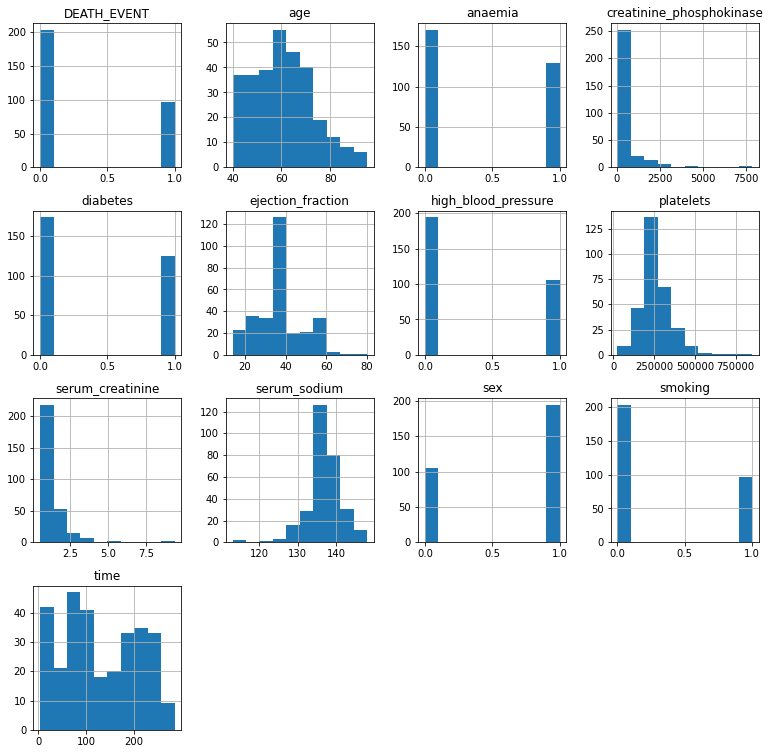

In [14]:
heart.hist(figsize=(13,13))
plt.show()

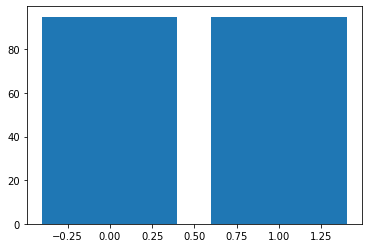

In [15]:
plt.bar(x=heart['sex'],height=heart['age'])
plt.show()

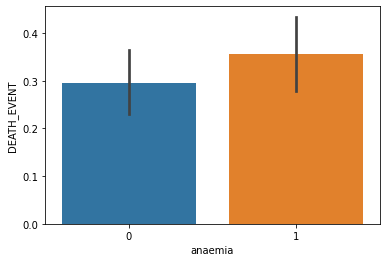

In [16]:
sns.barplot(x="anaemia", y="DEATH_EVENT", data=heart)
plt.show()

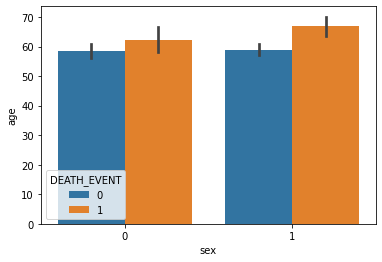

In [17]:
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['DEATH_EVENT'])

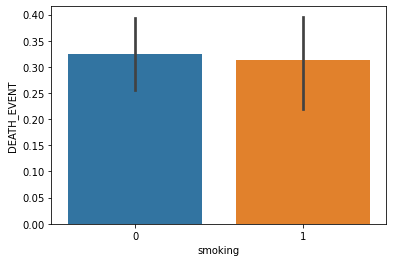

In [18]:
sns.barplot(heart["smoking"],heart['DEATH_EVENT'])

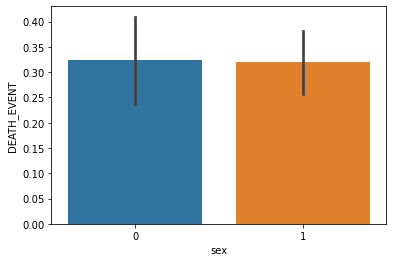

In [19]:
sns.barplot(heart["sex"],heart['DEATH_EVENT'])

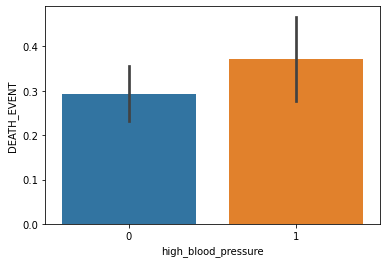

In [20]:
sns.barplot(heart["high_blood_pressure"],heart['DEATH_EVENT'])


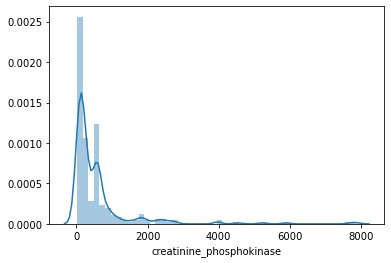

In [21]:
sns.distplot(heart["creatinine_phosphokinase"])

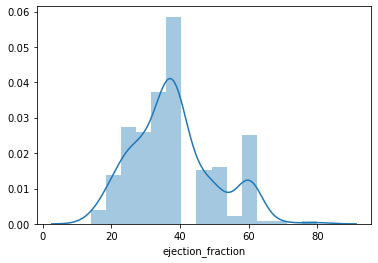

In [22]:
sns.distplot(heart["ejection_fraction"])

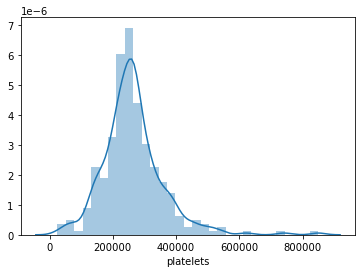

In [23]:
sns.distplot(heart["platelets"])

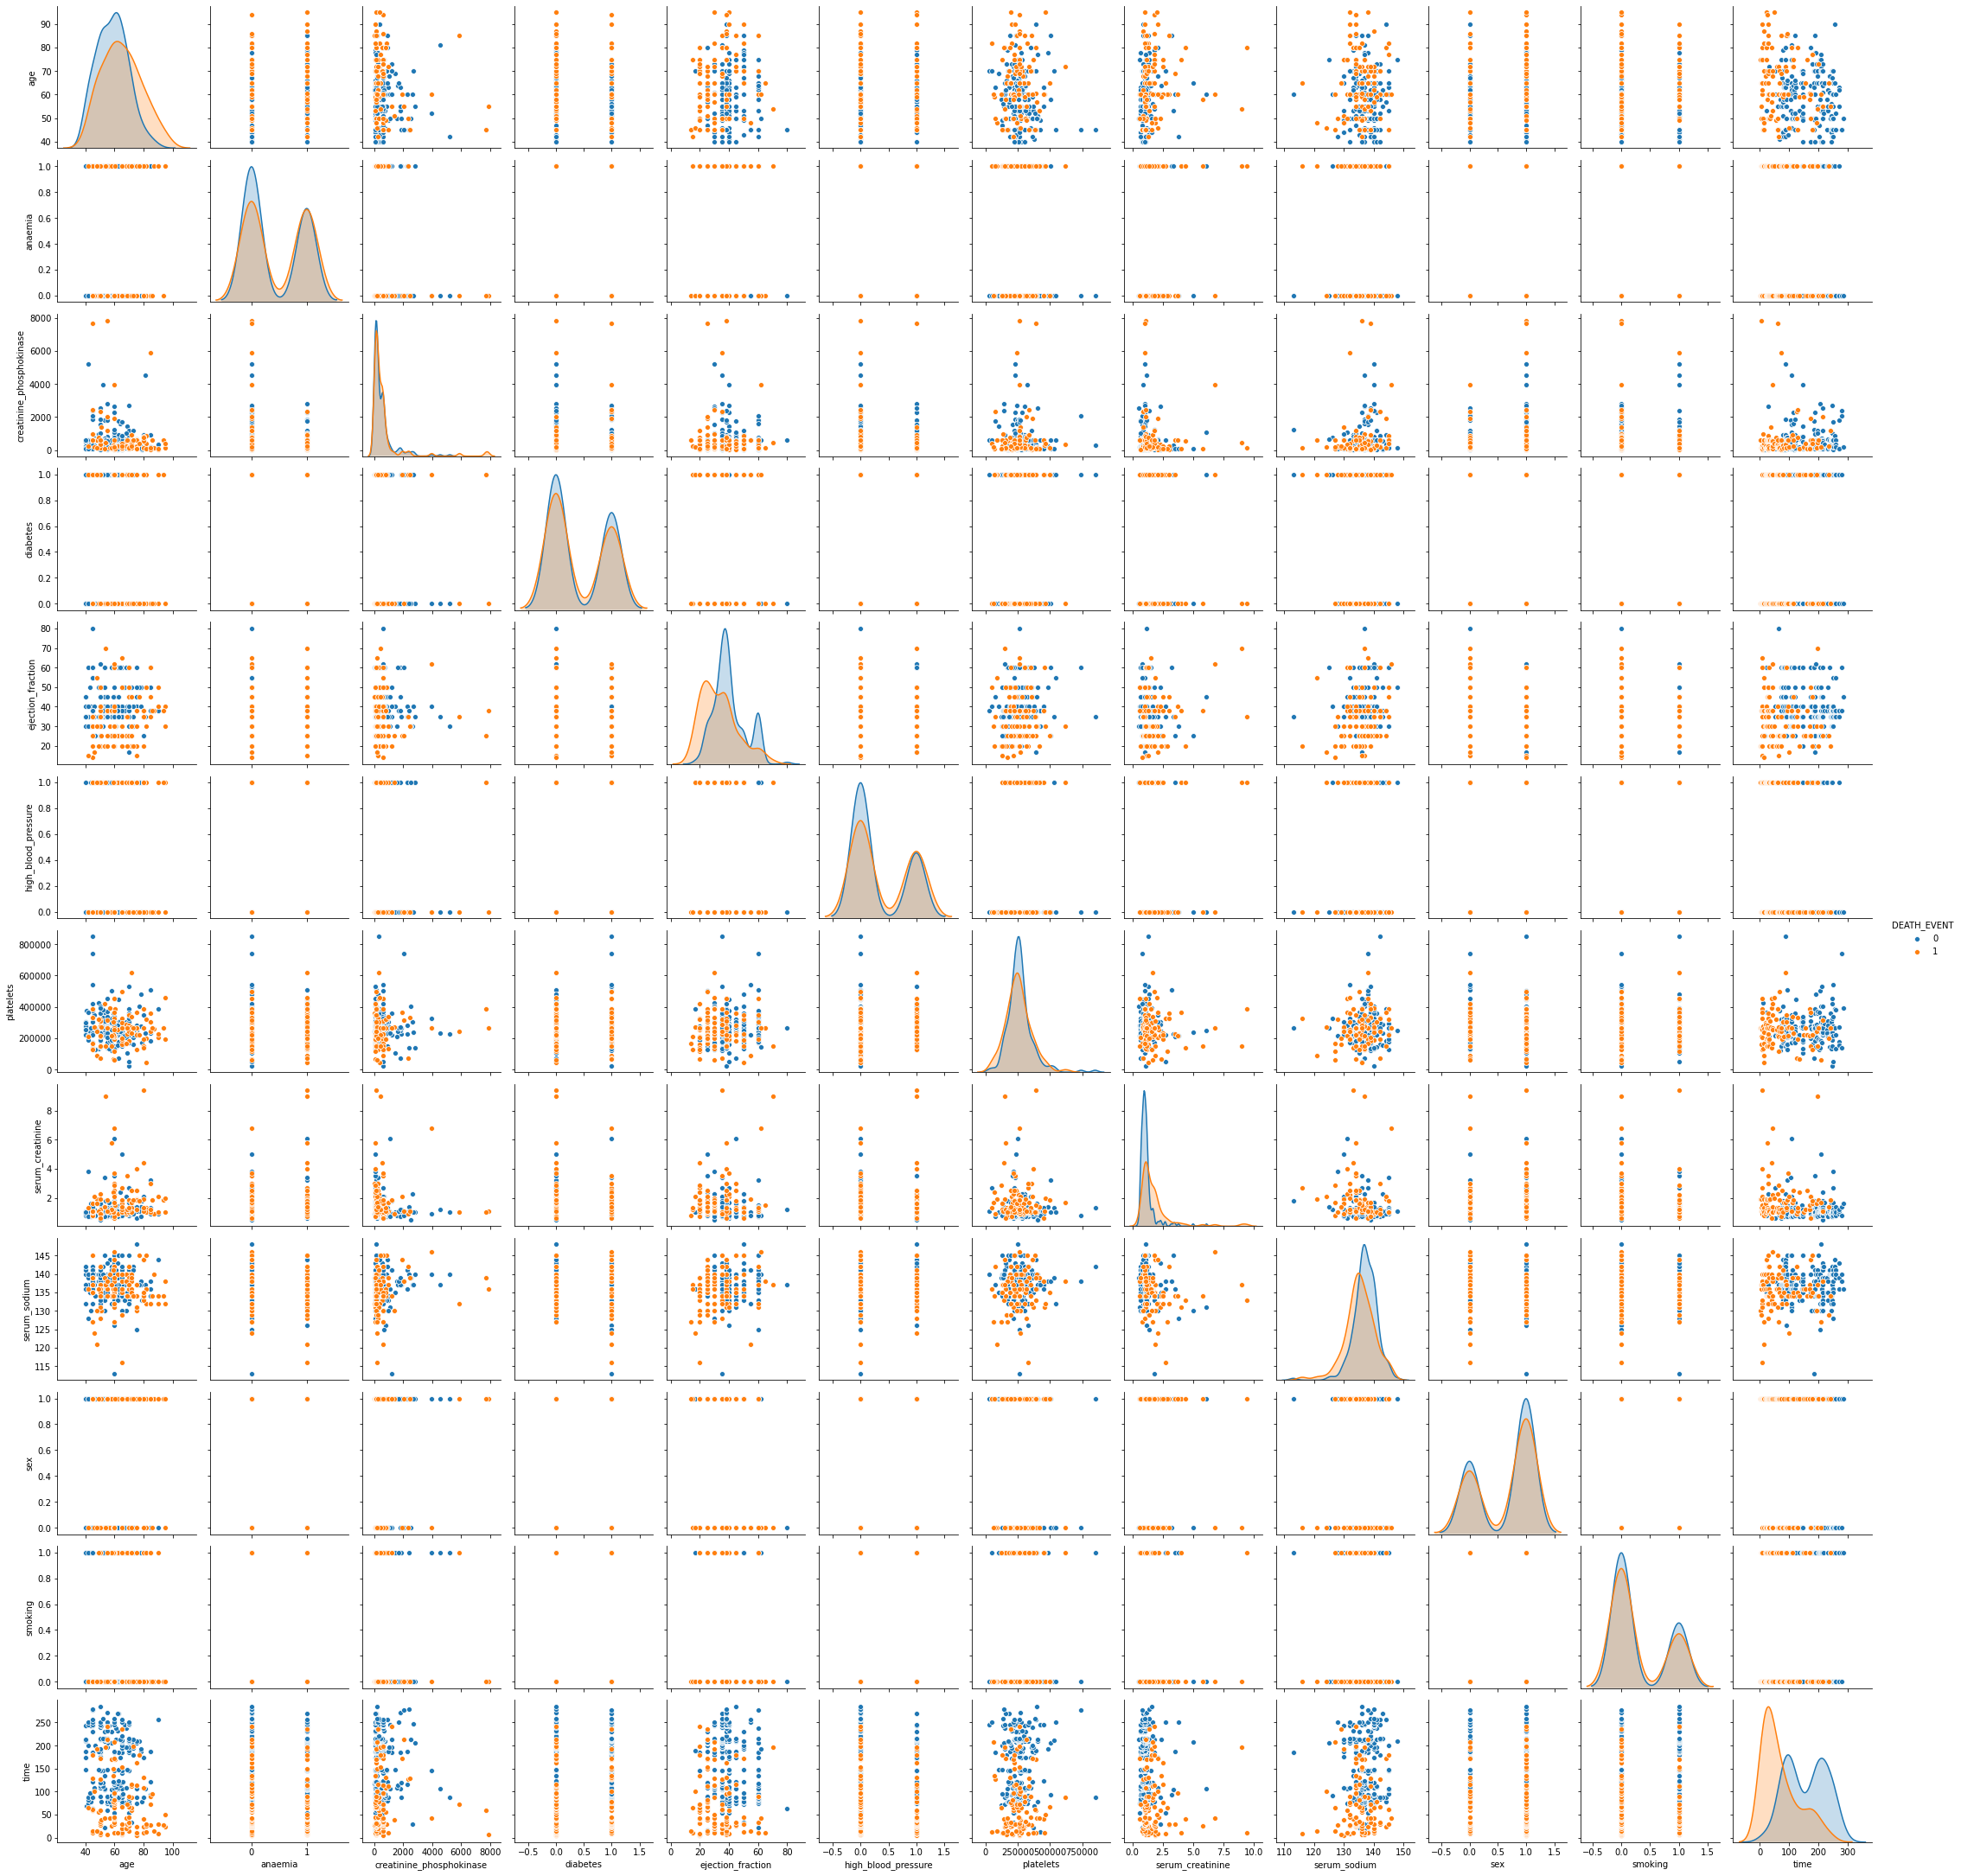

In [24]:
sns.pairplot(heart,hue='DEATH_EVENT')

In [25]:
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [26]:
numeric_columns=['creatinine_phosphokinase','ejection_fraction','platelets','age','serum_sodium','serum_creatinine']
numeric_columns

['creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'age',
 'serum_sodium',
 'serum_creatinine']

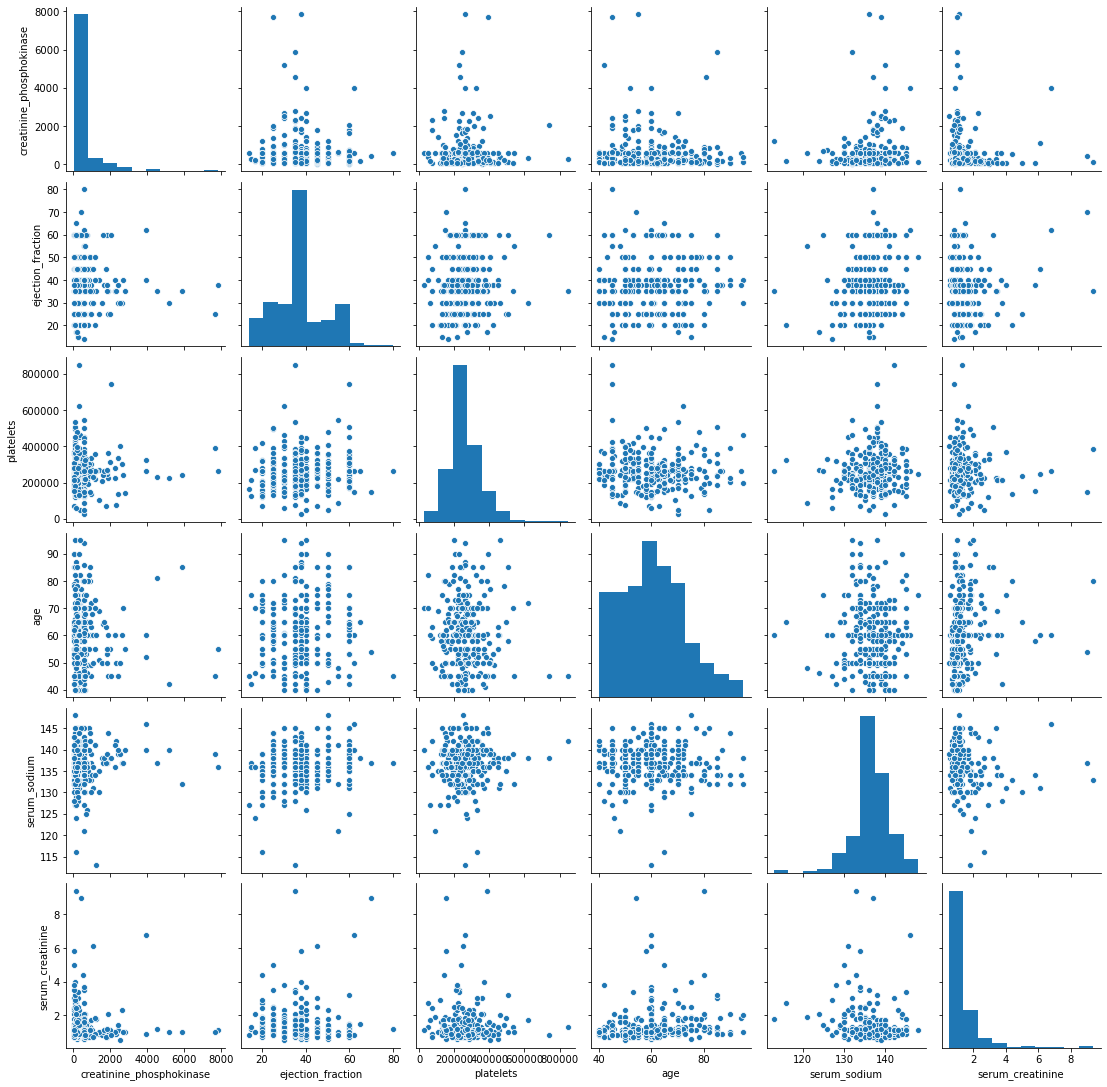

In [27]:
sns.pairplot(heart[numeric_columns])

In [28]:
heart['DEATH_EVENT']

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

0    203
1     96
Name: DEATH_EVENT, dtype: int64


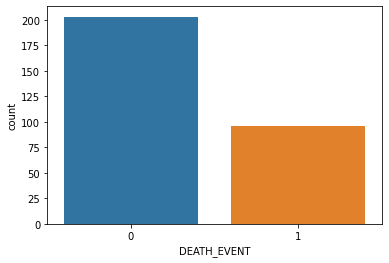

In [29]:
Y = heart['DEATH_EVENT']

sns.countplot(Y)

DEATH_EVENT = heart.DEATH_EVENT.value_counts()

print(DEATH_EVENT)

In [30]:
# create a correlation heatmap

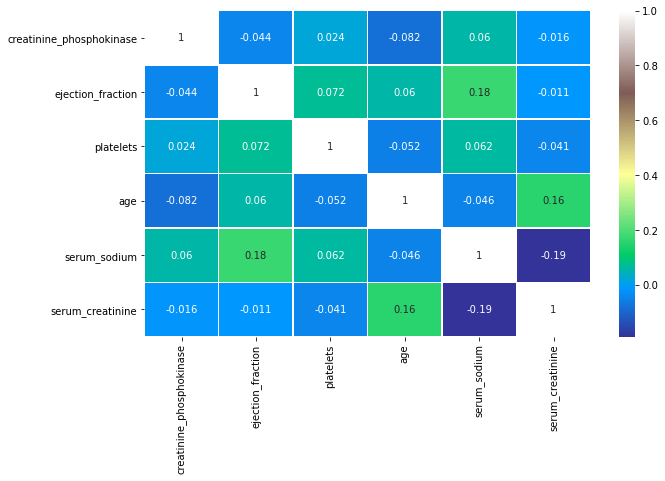

In [31]:
sns.heatmap(heart[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [32]:
# create four distplots

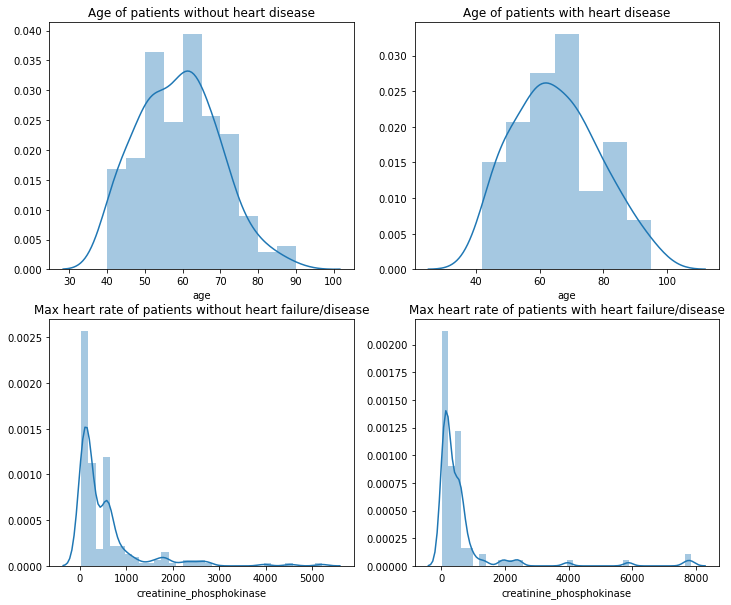

In [33]:
plt.figure(figsize=(12,10))

plt.subplot(221)
sns.distplot(heart[heart['DEATH_EVENT']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['DEATH_EVENT']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['DEATH_EVENT']==0].creatinine_phosphokinase )
plt.title('Max heart rate of patients without heart failure/disease')
plt.subplot(224)
sns.distplot(heart[heart['DEATH_EVENT']==1].creatinine_phosphokinase )
plt.title('Max heart rate of patients with heart failure/disease')
plt.show()

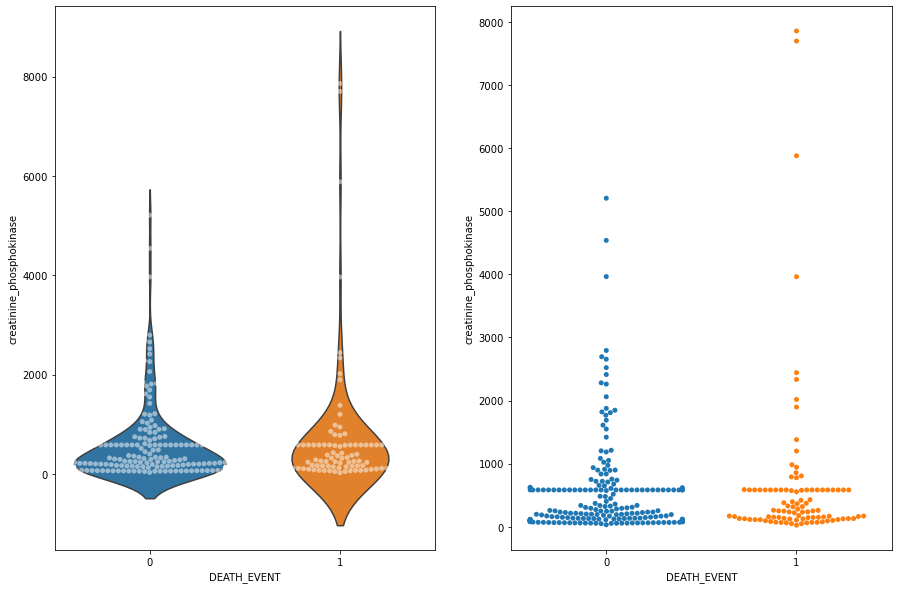

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.violinplot(x="DEATH_EVENT", y="creatinine_phosphokinase", data=heart, inner=None)
sns.swarmplot(x="DEATH_EVENT", y="creatinine_phosphokinase", data=heart, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="DEATH_EVENT", y="creatinine_phosphokinase", data=heart)
plt.show()

In [35]:
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [36]:
# create pairplot and two barplots

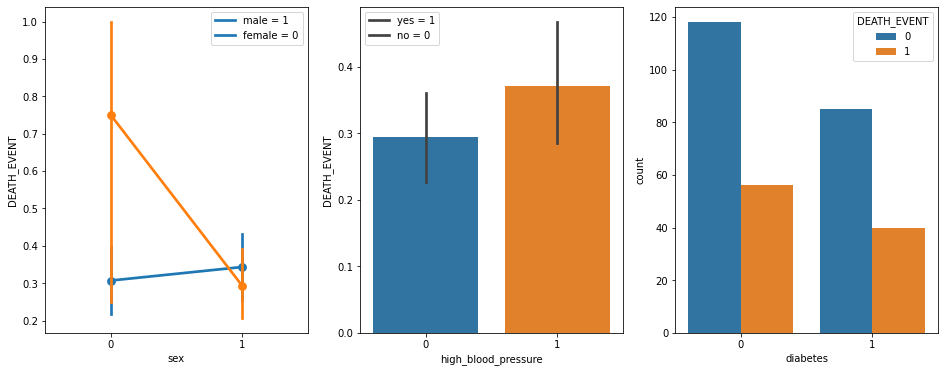

In [37]:
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="DEATH_EVENT", hue='smoking', data=heart)
plt.legend(['male = 1', 'female = 0'])

plt.subplot(132)
sns.barplot(x="high_blood_pressure", y="DEATH_EVENT", data=heart)
plt.legend(['yes = 1', 'no = 0'])

plt.subplot(133)
sns.countplot(x="diabetes", hue='DEATH_EVENT', data=heart)
plt.show()

In [38]:
#DATA Preprocessing

In [39]:
heart['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [40]:
heart['DEATH_EVENT'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Name: DEATH_EVENT, Length: 299, dtype: bool

In [41]:
heart['DEATH_EVENT'].isnull().sum()

0

In [42]:
heart['DEATH_EVENT'].sum()

96

In [43]:
heart['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

In [44]:
#Storing in X and y

In [45]:
X=heart

In [46]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [47]:
X= heart.drop('DEATH_EVENT',axis='columns')
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [48]:
Y=heart['DEATH_EVENT']
Y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [49]:
X.shape

(299, 12)

In [50]:
X.size

3588

In [51]:
Y.shape

(299,)

In [52]:
Y.size

299

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,test_size=0.3,shuffle=True)

In [56]:
X_test

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -1.35927151e+00, -6.87681906e-01, -1.38429148e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -1.35927151e+00, -6.87681906e-01, -8.68057932e-01],
       [ 1.61400136e+00, -8.71104775e-01,  3.26388248e-01, ...,
         7.35688190e-01,  1.45416070e+00, -5.58317804e-01],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01,  6.41925193e-01],
       [-9.96546628e-01, -8.71104775e-01,  2.13862126e-01, ...,
         7.35688190e-01,  1.45416070e+00, -9.71304642e-01],
       [ 1.19294523e+00,  1.14796753e+00,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -2.22765998e-01]])

In [57]:
Y_test

24     1
64     0
102    0
170    0
285    0
      ..
49     1
273    0
194    1
58     1
148    1
Name: DEATH_EVENT, Length: 90, dtype: int64

In [58]:
print ("train_set_X shape: " + str(X_train.shape))
print ("train_set_Y shape: " + str(Y_train.shape))
print ("test_set_X shape: " + str(X_test.shape))
print ("test_set_Y shape: " + str(Y_test.shape))

train_set_X shape: (209, 12)
train_set_Y shape: (209,)
test_set_X shape: (90, 12)
test_set_Y shape: (90,)


In [59]:
# Model

In [60]:
# Decision Tree Classifier
scores_dict = {}

In [61]:
Catagory=['No....but i pray you get Heart failure/Disease or at leaset Corona Virus Soon...','Yes you have Heart failure/Disease....RIP in Advance']

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier() #model = tree.DecisionTreeClassifier()
dt.fit(X_train,Y_train) #model.fit(X,Y)

DecisionTreeClassifier()

In [67]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(Y_test,prediction)*100

In [68]:
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(accuracy_dt)

83.33333333333334


In [69]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.833


In [70]:
prediction

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1], dtype=int64)

In [71]:
X_DT=np.array([[75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4]])
X_DT_prediction=dt.predict(X_DT)

In [72]:
X_DT_prediction[0]

1

In [73]:
print(Catagory[int(X_DT_prediction[0])])

Yes you have Heart failure/Disease....RIP in Advance


In [74]:
#Feature Importance in Decision Trees

In [75]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.07094988 0.01464508 0.11951862 0.         0.03723722 0.
 0.02664011 0.08617357 0.11206294 0.         0.03319758 0.499575  ]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


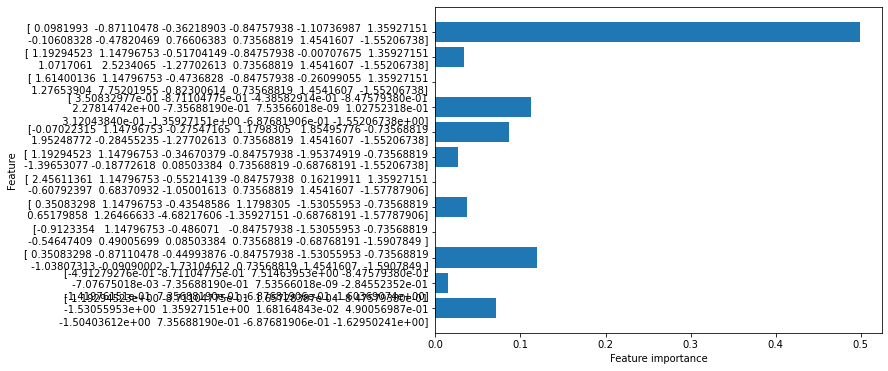

In [76]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 12
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')

In [77]:
#KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
k_range=range(1,20)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(Y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(Y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 13 with score : 0.7555555555555555


In [80]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=13)

In [81]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(Y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(Y_test,prediction_knn)*100,'%')
print('mean_squared_error score : ',mean_squared_error(Y_test,prediction_knn)*100,'%')

accuracy_score score     :  75.55555555555556 %
mean_squared_error score :  24.444444444444443 %


In [82]:
scores_dict['KNeighborsClassifier'] = accuracy_knn
accuracy_knn

75.55555555555556

In [83]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, Y_test)))

Accuracy on training set: 0.785
Accuracy on test set: 0.756


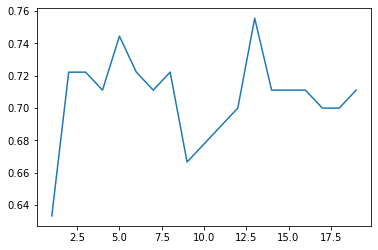

In [84]:
plt.plot(k_range,scores_list)

In [85]:
X_knn=np.array([[75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4]])
X_knn=sc.transform(X_knn)
X_knn_prediction=dt.predict(X_knn)

In [86]:
X_knn

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04,
        -8.47579380e-01, -1.53055953e+00,  1.35927151e+00,
         1.68164843e-02,  4.90056987e-01, -1.50403612e+00,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00]])

In [87]:
(X_knn_prediction[0])

1

In [88]:
print(Catagory[int(X_knn_prediction[0])])

Yes you have Heart failure/Disease....RIP in Advance


In [89]:
from sklearn.svm import SVC

model = SVC(C=2.0,kernel='rbf',gamma='auto').fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print('Accuracy score : {}%'.format(accuracy_score(Y_test,Y_predict)*100))
scores_dict['SVC'] = accuracy_score(Y_test,Y_predict)*100

Accuracy score : 74.44444444444444%


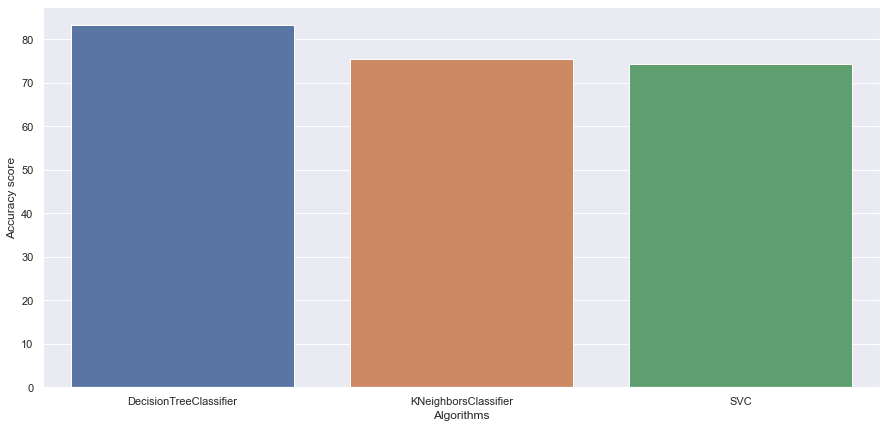

In [90]:
with sns.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scoress = list(scores_dict.values())

  sns.set(rc={'figure.figsize':(15,7)})
  plt.xlabel("Algorithms")
  plt.ylabel("Accuracy score")

  sns.barplot(algo_name,scoress)